In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Data Cleaning**

In [2]:
df = pd.read_csv('/content/heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:
df.drop_duplicates(inplace=True, keep = 'first')

# Data Visualization

**Gender Category**

In [7]:
gender = df.sex.value_counts()
gender

sex
1    206
0     96
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender Category')

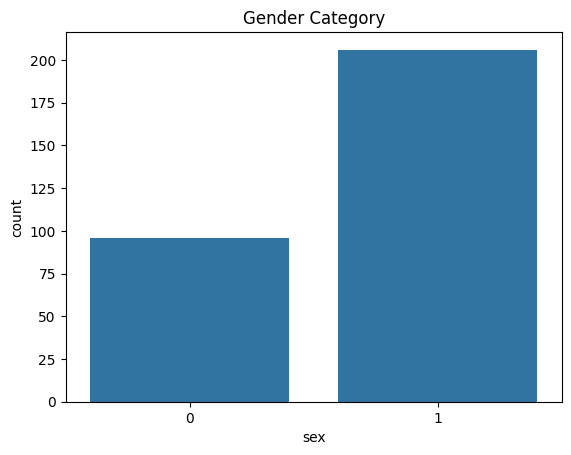

In [8]:
gender_plot = sns.countplot(x = 'sex', data = df)
gender_plot.set_title('Gender Category')

**Chest Pain**

Text(0.5, 1.0, 'Chext Pain Category')

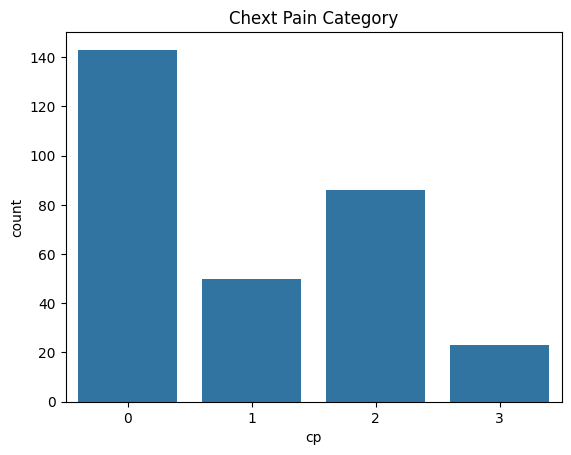

In [9]:
cp_plot = sns.countplot(x = 'cp', data = df)
cp_plot.set_title('Chext Pain Category')

**Patients count per Age group**

Text(0.5, 1.0, 'Patients count per Age group')

<Figure size 1000x1000 with 0 Axes>

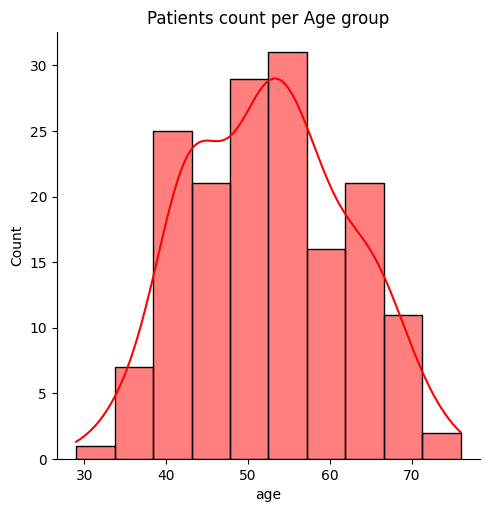

In [10]:
plt.figure(figsize=(10, 10))
sns.displot(df[df['output']==1].age, color = "red", kde=True)
plt.title('Patients count per Age group')

**Patients count based on cholesterol level group**

Text(0.5, 1.0, 'Patients count based on cholesterol level group')

<Figure size 1000x1000 with 0 Axes>

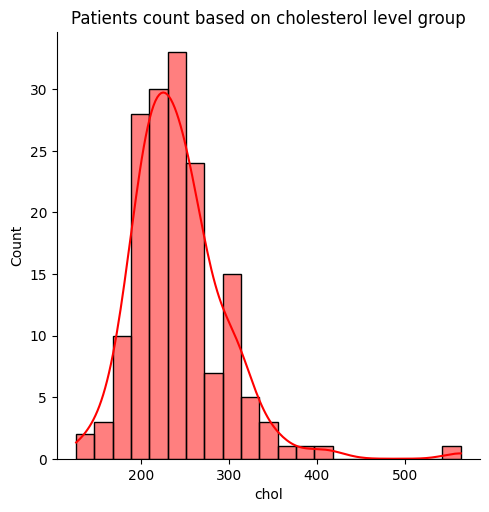

In [11]:
plt.figure(figsize=(10, 10))
sns.displot(df[df['output']==1].chol, color = "red", kde=True)
plt.title('Patients count based on cholesterol level group')

**Type of Chest pain resulting in Heart Attack**

Text(0.5, 1.0, 'Type of Chest pain resulting in Heart Attack')

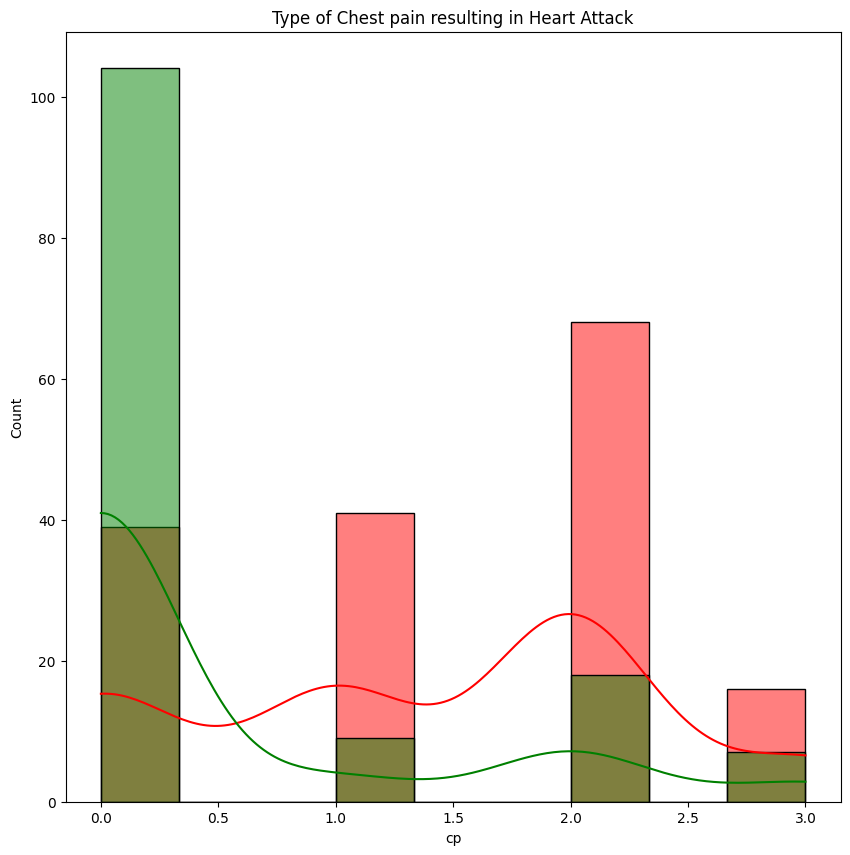

In [12]:
plt.figure(figsize=(10, 10))
sns.histplot(df[df['output']==1].cp, color = "red", kde=True)
sns.histplot(df[df['output']==0].cp, color = "green", kde=True)
plt.title('Type of Chest pain resulting in Heart Attack')

**Age Group most affected**

Text(0.5, 1.0, 'Age Group most affected')

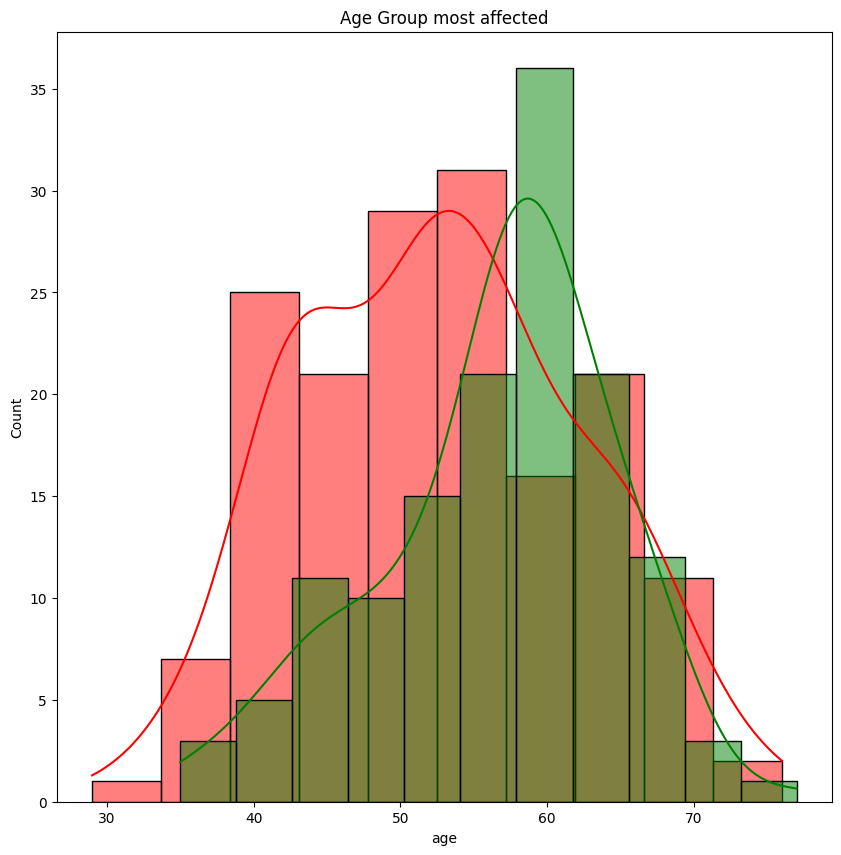

In [13]:
plt.figure(figsize=(10, 10))
sns.histplot(df[df['output']==1].age, color = "red", kde=True)
sns.histplot(df[df['output']==0].age, color = "green", kde=True)
plt.title('Age Group most affected')

# Creating training and testing Data for Model

In [14]:
X = df.drop(['output'], axis = 1)

In [15]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [16]:
Y = df['output']

In [17]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 302, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

**Standardizing the data**

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Training and Testing the model

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
model = GaussianNB()

In [25]:
model.fit(X_train, Y_train)

GaussianNB()

In [26]:
results = model.predict(X_test)

In [27]:
results

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0])

**Testing the results**

In [28]:
from sklearn.metrics import accuracy_score, precision_score

In [29]:
print("Accuracy: ", accuracy_score(Y_test, results))
print("Precision: ", precision_score(Y_test, results))

Accuracy:  0.8360655737704918
Precision:  0.8235294117647058


In [37]:
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
confusion = confusion_matrix(Y_test, results)

**Visualizing the Confusion Matrix**

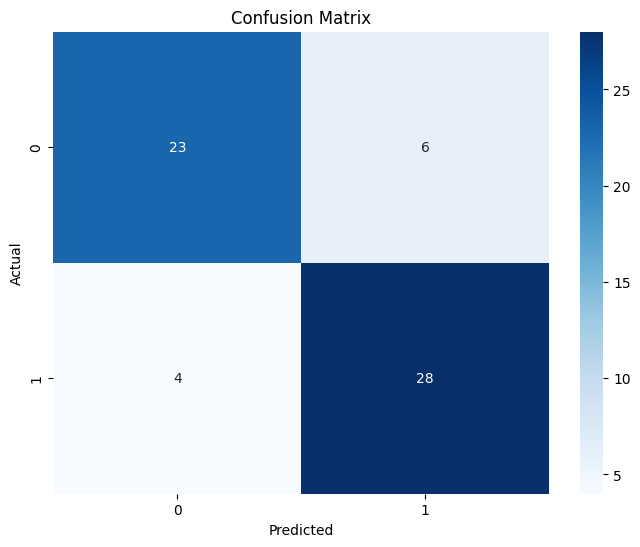

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Report of Classification

In [40]:
report = classification_report(Y_test, results, output_dict=True)

In [41]:
report

{'0': {'precision': 0.8518518518518519,
  'recall': 0.7931034482758621,
  'f1-score': 0.8214285714285715,
  'support': 29},
 '1': {'precision': 0.8235294117647058,
  'recall': 0.875,
  'f1-score': 0.8484848484848485,
  'support': 32},
 'accuracy': 0.8360655737704918,
 'macro avg': {'precision': 0.8376906318082789,
  'recall': 0.834051724137931,
  'f1-score': 0.83495670995671,
  'support': 61},
 'weighted avg': {'precision': 0.836994178363513,
  'recall': 0.8360655737704918,
  'f1-score': 0.8356220282449791,
  'support': 61}}